In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
import os
from IPython.display import clear_output

In [2]:
# Helper libraries
import numpy as np
import random
%matplotlib inline
# import matplotlib
# matplotlib.use('TkAgg')# Backend needed for the Mac virtual env
import matplotlib.pyplot as plt

In [3]:
def seed_random_number(seed):
    # see https://stackoverflow.com/a/52897216
    np.random.seed(seed)
    tf.set_random_seed(seed)
    os.environ['PYTHONHASHSEED']=str(seed)
    random.seed(seed)

random_seed = 1
seed_random_number(random_seed)
#####################
# from keras import backend as K
# # see https://stackoverflow.com/a/52897216 we really need singlethread to get
# # reproducible results!
# session_conf = tensorflow.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
# sess = tensorflow.Session(graph=tensorflow.get_default_graph(), config=session_conf)
# K.set_session(sess)

In [4]:
# Required for live plotting of errors while training
# Taken and adapted from:
# https://github.com/kapil-varshney/utilities/blob/master/training_plot/training_plot_ex_with_cifar10.ipynb
class TrainingPlot(keras.callbacks.Callback):
    
    # This function is called when the training begins
    def on_train_begin(self, logs={}):
        # Initialize the lists for holding the logs, losses
        self.losses = []
        self.val_losses = []
        self.logs = []
    
    # This function is called at the end of each epoch
    def on_epoch_end(self, epoch, logs={}):
        
        # Append the logs, losses to the lists
        self.logs.append(logs)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        
        # Before plotting ensure at least 2 epochs have passed
        if epoch > 1 and epoch%500 == 0:
            
            # Clear the previous plot
            clear_output(wait=True)
            N = np.arange(0, len(self.losses))
            
            # Plot train loss, train acc, val loss and val acc against epochs passed
            plt.figure()
            plt.loglog(N, self.losses, label = "train_loss")
            plt.loglog(N, self.val_losses, label = "val_loss")
            plt.title("Training Loss [Epoch {}]".format(epoch))
            plt.xlabel("Epoch #")
            plt.ylabel("Loss")
            plt.legend()
            plt.show()

plot_losses = TrainingPlot()

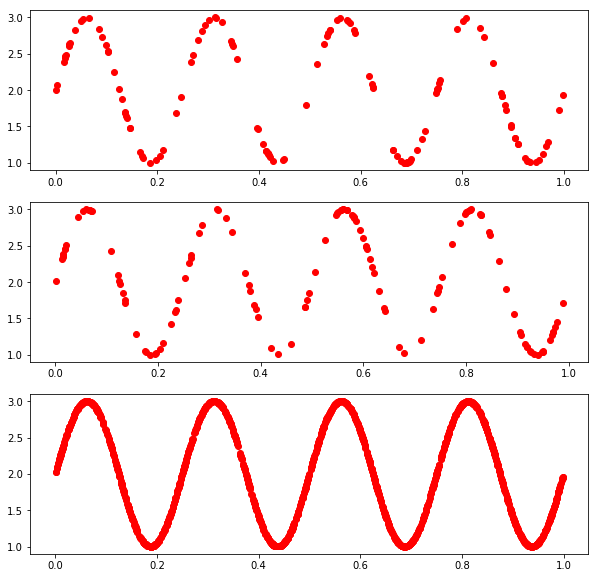

In [5]:
# Data set:
# Dividing data into train, validation, test sets
Nsamples = 2000
Ntrain   = 128
Nvalid   = 128

x = np.random.rand(Nsamples,1)
y = 2.0 + np.sin(8*np.pi*x)

train_input = x[0:Ntrain,:]
train_truth = y[0:Ntrain,:]
valid_input = x[Ntrain:Ntrain+Nvalid,:]
valid_truth = y[Ntrain:Ntrain+Nvalid,:]
test_input = x[Ntrain+Nvalid:-1,:]
test_truth = y[Ntrain+Nvalid:-1,:]

plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
plt.plot(train_input,train_truth,'o',Color='red')
plt.draw()

plt.subplot(3,1,2)
plt.plot(valid_input,valid_truth,'o',Color='red')
plt.draw()

plt.subplot(3,1,3)
plt.plot(test_input,test_truth,'o',Color='red')
plt.draw()

plt.show()

In [6]:
# Function describing network architecture
# DEMONOSTRATE ISSUE OF DYING NEURONS
# RELU Doesnt work. But Leaky ReLU does
def create_model():

#   model = keras.Sequential([
#           keras.layers.Dense(20, input_shape = (1,), activation=tf.keras.layers.ReLU(max_value=None), use_bias=True, kernel_initializer='RandomNormal', bias_initializer='RandomNormal'),
#           keras.layers.Dense(20, activation=tf.keras.layers.ReLU(max_value=None), use_bias=True, kernel_initializer='RandomNormal', bias_initializer='RandomNormal'),
#           keras.layers.Dense(20, activation=tf.keras.layers.ReLU(max_value=None), use_bias=True, kernel_initializer='RandomNormal', bias_initializer='RandomNormal'),
#           keras.layers.Dense(20, activation=tf.keras.layers.ReLU(max_value=None), use_bias=True, kernel_initializer='RandomNormal', bias_initializer='RandomNormal'),
#           keras.layers.Dense(20, activation=tf.keras.layers.ReLU(max_value=None), use_bias=True, kernel_initializer='RandomNormal', bias_initializer='RandomNormal'),
#           keras.layers.Dense(1, use_bias=True, kernel_initializer='RandomNormal', bias_initializer='RandomNormal')
#   ])

  model = keras.Sequential([
          keras.layers.Dense(20, input_shape = (1,), activation=tf.keras.layers.LeakyReLU(alpha=0.01), use_bias=True, kernel_initializer='RandomNormal', bias_initializer='RandomNormal'),
          keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.01), use_bias=True, kernel_initializer='RandomNormal', bias_initializer='RandomNormal'),
          keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.01), use_bias=True, kernel_initializer='RandomNormal', bias_initializer='RandomNormal'),
          keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.01), use_bias=True, kernel_initializer='RandomNormal', bias_initializer='RandomNormal'),
          keras.layers.Dense(20, activation=tf.keras.layers.LeakyReLU(alpha=0.01), use_bias=True, kernel_initializer='RandomNormal', bias_initializer='RandomNormal'),
          keras.layers.Dense(1, use_bias=True, kernel_initializer='RandomNormal', bias_initializer='RandomNormal')
  ])

  
  model.compile(optimizer=keras.optimizers.Adam(), 
                loss='mse',
                metrics=['mse'])
  
  return model

model = create_model()
model.summary()
#model.get_weights()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                40        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_4 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 1,741
Trainable params: 1,741
Non-trainable params: 0
_________________________________________________________________


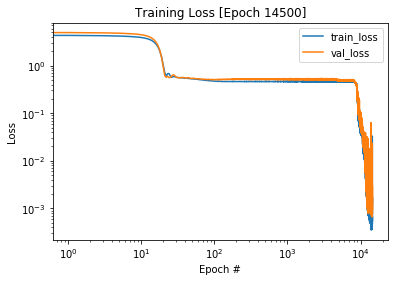

In [7]:
# Training
model.fit(train_input, 
          train_truth, 
          epochs=15000, 
          verbose=0, 
          batch_size=32, 
          shuffle=True, 
          validation_data=(valid_input,valid_truth),
          callbacks=[plot_losses]
          )

128/128 [==============================] - 0s 47us/step
('Test accuracy:', 0.001145159752923064)
128/128 [==============================] - 0s 34us/step
('Test accuracy:', 0.0015351285692304373)
1743/1743 [==============================] - 0s 14us/step
('Test accuracy:', 0.001694618904887262)


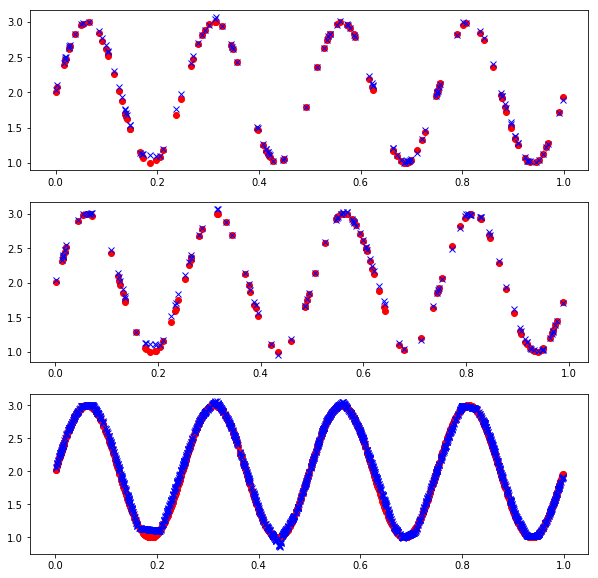

In [9]:


# Performance of trained model
train_loss, train_mse = model.evaluate(train_input, train_truth)
print('Test accuracy:', train_mse)

valid_loss, valid_mse = model.evaluate(valid_input, valid_truth)
print('Test accuracy:', valid_mse)

test_loss, test_mse = model.evaluate(test_input, test_truth)
print('Test accuracy:', test_mse)


plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
plt.plot(train_input,train_truth,'o',Color='red')
plt.plot(train_input,model.predict(train_input),'x',Color='blue')
plt.draw()

plt.subplot(3,1,2)
plt.plot(valid_input,valid_truth,'o',Color='red')
plt.plot(valid_input,model.predict(valid_input),'x',Color='blue')
plt.draw()

plt.subplot(3,1,3)
plt.plot(test_input,test_truth,'o',Color='red')
plt.plot(test_input,model.predict(test_input),'x',Color='blue')
plt.draw()

plt.show()